In [1]:
from google.colab import files
uploaded = files.upload()


Saving Train.csv to Train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Train.csv")
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
slice_flight = df[df['Mode_of_Shipment'] == 'Flight']
slice_flight['Mode_of_Shipment'].value_counts()


,count
Mode_of_Shipment,
Flight,1777


In [8]:
slice_flight = df[df['Mode_of_Shipment'] == 'Flight']
slice_flight.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
slice_high_priority = df[df['Product_importance'] == 'high']
slice_high_priority.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
13,14,F,Flight,4,4,275,3,high,M,29,2602,1
18,19,D,Ship,5,5,239,3,high,M,18,2495,1
23,24,F,Ship,4,3,211,3,high,M,12,3922,1
26,27,A,Ship,4,1,172,3,high,F,24,1066,1
36,37,D,Ship,3,5,137,4,high,F,62,1477,1


In [6]:
slice_high_priority['Reached.on.Time_Y.N'].value_counts()

,count
Reached.on.Time_Y.N,
1,616
0,332


In [9]:
dice_problem_orders = df[
    (df['Cost_of_the_Product'] > df['Cost_of_the_Product'].mean()) &
    (df['Weight_in_gms'] > df['Weight_in_gms'].mean()) &
    (df['Reached.on.Time_Y.N'] == 0)
]

dice_problem_orders.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3136,3137,C,Road,3,3,219,3,low,M,4,5956,0
3138,3139,D,Road,4,5,225,4,medium,M,5,4622,0
3140,3141,A,Road,3,3,256,4,medium,M,3,4732,0
3143,3144,F,Road,3,3,253,3,medium,M,7,5085,0
3147,3148,B,Flight,4,2,272,3,high,F,6,4559,0


In [10]:
dice_happycustomer = df[
    (df['Customer_rating'] >= 4) &
    (df['Customer_care_calls'] <= 2) &
    (df['Reached.on.Time_Y.N'] == 1)
]

dice_happycustomer.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
22,23,C,Ship,2,5,156,2,low,M,2,1750,1
37,38,F,Ship,2,4,181,6,medium,F,16,3605,1
55,56,F,Ship,2,5,246,5,low,M,46,2437,1
81,82,B,Ship,2,5,132,3,low,M,18,1759,1
118,119,C,Road,2,5,263,3,low,F,5,2947,1


In [11]:
rollup_warehouse = df.groupby('Warehouse_block').agg({
    'Reached.on.Time_Y.N': 'mean',
    'Cost_of_the_Product': 'mean',
    'Discount_offered': 'mean'
})

rollup_warehouse

,Reached.on.Time_Y.N,Cost_of_the_Product,Discount_offered
Warehouse_block,,,
A,0.586470,208.767594,13.222586
B,0.602291,212.159302,13.187125
C,0.596836,211.191489,13.399891
D,0.597601,210.907852,13.093784
F,0.598472,209.077196,13.668031


In [12]:
drill_warehouse_mode = df.groupby(
    ['Warehouse_block','Mode_of_Shipment']
)['Reached.on.Time_Y.N'].mean().reset_index()

drill_warehouse_mode


,Warehouse_block,Mode_of_Shipment,Reached.on.Time_Y.N
0,A,Flight,0.585859
1,A,Road,0.571429
2,A,Ship,0.590177
3,B,Flight,0.597973
4,B,Road,0.585034
5,B,Ship,0.607401
6,C,Flight,0.623729
7,C,Road,0.574830
8,C,Ship,0.595659
9,D,Flight,0.599327


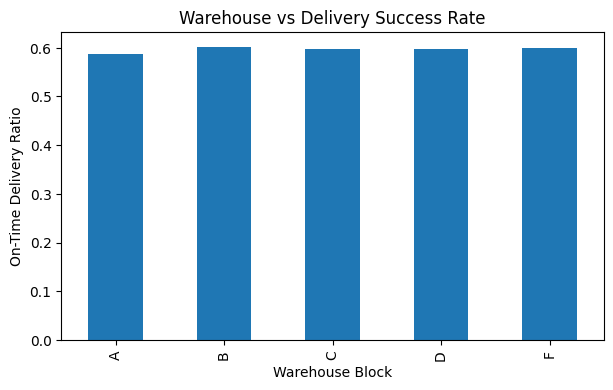

In [14]:
warehouse_delivery = df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].mean()

warehouse_delivery.plot(kind='bar', figsize=(7,4))
plt.title("Warehouse vs Delivery Success Rate")
plt.xlabel("Warehouse Block")
plt.ylabel("On-Time Delivery Ratio")
plt.show()


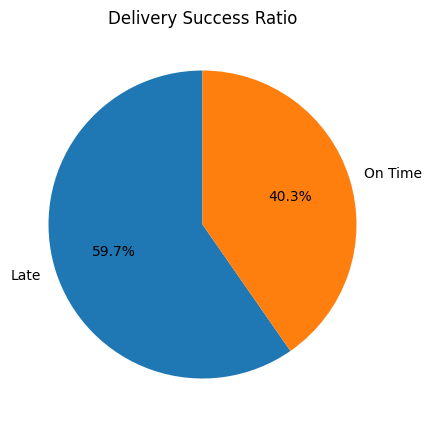

In [15]:
plt.figure(figsize=(5,5))
df['Reached.on.Time_Y.N'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Late','On Time'],
    startangle=90
)
plt.title("Delivery Success Ratio")
plt.ylabel("")
plt.show()
